/var/folders/4b/3_jhyggn2dxfqy54g1f91kx80000gn/T/ipykernel_7887/1366180096.py:48: DeprecationWarning: 
The method Analyze.simple_winkler_analysis() will be removed in version 1.0.0.
Please use the Analyze.winkler() instead.
  Result = simple_winkler_analysis(M)


Converged at iteration no. 6


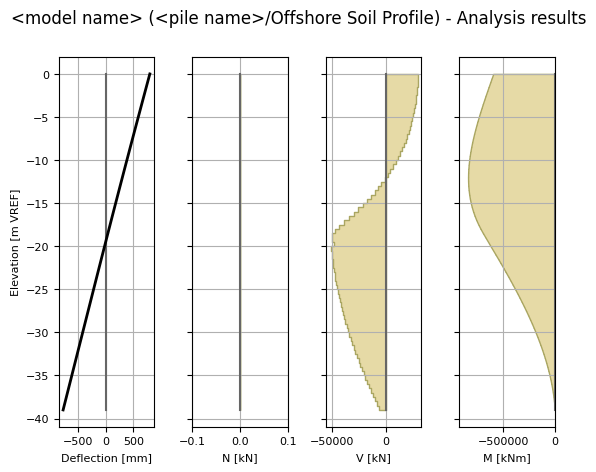

In [1]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand, API_clay_axial


p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-39, diameter=10.0, wt=0.10
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(
                phi=33,
                kind="cyclic",
                extension="mt_curves",
            ),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, kind="cyclic", extension="mt_curves"),
            axial_model=API_clay_axial(Su=70),
        ),
    ],
)

# Create Model
M = Model(name="<model name>", pile=p, soil=sp)

# Apply bottom fixity along x-axis
M.set_support(elevation=-39, Tx=True)
# Apply axial and lateral loads
M.set_pointload(elevation=0, Mz=-600e3, Py=30e3)

# Run analysis
from openpile.analyze import simple_winkler_analysis

Result = simple_winkler_analysis(M)

# plot the results
Result.plot()


In [2]:
M._qz_springs[-1]

array([[[ 0.0000000e+00,  0.0000000e+00,  4.8985284e+02,  9.7970569e+02,
          1.4695586e+03,  1.7634702e+03,  1.9594114e+03,  1.9594114e+03],
        [ 2.0000001e-02, -0.0000000e+00, -2.0000001e-02, -1.3000000e-01,
         -4.1999999e-01, -7.3000002e-01, -1.0000000e+00, -2.0000000e+00]]],
      dtype=float32)

In [5]:
import numpy as np

np.append(np.array([1,2,3]), None)

array([1, 2, 3, None], dtype=object)

In [ ]:
from openpile.calculate import shaft_resistance, unit_end_bearing, isplugged

shaft_resistance(M,True, True)
unit_end_bearing(M)*p.tip_footprint
isplugged(M, method="API-87", kind="tension")

False

In [ ]:
from openpile.calculate import effective_pile_weight

effective_pile_weight(M)


8459.680697586553

In [ ]:
layer = Layer(
    name="Soft Clay",
    top=-10,
    bottom=0,
    weight=19,
    lateral_model=API_clay(Su=[30, 35], eps50=[0.01, 0.02], Neq=100),
)


Bottom elevation is higher than top elevation


ValidationError: 1 validation error for Layer
__root__
   (type=value_error)

In [ ]:
from openpile.construct import SoilProfile, Layer
from openpile.soilmodels import API_sand, API_clay

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, kind="cyclic"),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, kind="cyclic"),
        ),
    ],
)

print(sp)


In [ ]:
from openpile.construct import Layer
from openpile.soilmodels import API_clay

# Create a layer
layer1 = Layer(
    name="Soft Clay",
    top=0,
    bottom=-10,
    weight=18,
    lateral_model=API_clay(Su=[30, 35], eps50=[0.01, 0.02], kind="static"),
)

print(layer1)


In [ ]:
import matplotlib.pyplot as plt
from openpile.utils.py_curves import api_sand

p, y = api_sand(
    sig=50,  # vertical stress in kPa
    X=5,  # depth in meter
    phi=35,  # internal angle of friction
    D=5,  # the pile diameter
    below_water_table=True,  # use initial subgrade modulus under water
    kind="static",  # static curve
)

plt.plot(y, p)
plt.ylabel("p [kN/m]")
plt.xlabel("y [m]")


In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import Dunkirk_sand, Cowden_clay, API_clay

# Create a pile instance with two sections of respectively 10m and 30m length.
p = Pile.create(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [6, 6],
        "diameter": [2.0, 2.0],
        "wall thickness": [0.07, 0.08],
    },
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="blabla 1",
            top=0,
            bottom=-10,
            weight=18,
            lateral_model=Cowden_clay(Su=150, G0=30e3),
        ),
        Layer(
            name="ohlalal",
            top=-10,
            bottom=-30,
            weight=18,
            lateral_model=Cowden_clay(Su=150, G0=30e3),
        ),
    ],
)

sp.plot()


In [ ]:
# import libraries
from openpile.construct import Pile, Model
from openpile.analyze import simple_beam_analysis

# create pile
pile = Pile(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={"length": [40], "diameter": [2], "wall thickness": [0.08]},
)

M = Model(name="", pile=pile)
M.set_support(elevation=0, Tx=True, Ty=True)
M.set_support(elevation=-40, Ty=True)
M.set_pointload(elevation=-20, Py=1000)

result = simple_beam_analysis(M)


In [ ]:
M.plot()


In [ ]:
# import p-y curve for api_sand from openpile.utils
from openpile.utils.py_curves import api_sand

y, p = api_sand(
    sig=50,  # vertical stress in kPa
    X=5,  # depth in meter
    phi=35,  # internal angle of friction
    D=5,  # the pile diameter
    below_water_table=True,  # use initial subgrade modulus under water
    kind="cyclic",  # static curve
)

# create a plot of the results with Matplotlib
import matplotlib.pyplot as plt

plt.plot(y, p)
plt.ylabel("p [kN/m]")
plt.xlabel("y [m]")


In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand


p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-40, diameter=7, wt=0.050
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sps = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-40,
            weight=18,
            lateral_model=API_sand(
                phi=33,
                kind="static",
                extension="mt_curves",
            ),
        ),
    ],
)

# Create a 40m deep offshore Soil Profile with a 15m water column
spc = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-50,
            weight=18,
            lateral_model=API_sand(phi=33, kind="cyclic", extension="mt_curves"),
        ),
    ],
)

# Create Model
M = Model(name="<model name>", pile=p, soil=spc)

# Apply bottom fixity along x-axis
M.set_support(elevation=-40, Tx=True)
# Apply axial and lateral loads
M.set_pointload(elevation=0, Mz=-600e3, Py=30e3)

# Run analysis
from openpile.analyze import winkler

Result = winkler(M)

# plot the results
Result.plot()

M.soil_properties


In [ ]:
M.get_py_springs()


### Check if multipliers work

In [ ]:
from openpile.construct import Layer
from openpile.soilmodels import API_sand
from openpile.utils.multipliers import durkhop

# Create a Layer with API_sand and monotonic curves with Durkhop approach
Layer(
    name="medium dense sand",
    top=0,
    bottom=-40,
    weight=18,
    lateral_model=API_sand(phi=33, kind="cyclic", p_multiplier=durkhop(D=7.0, ra=1.0)),
)


In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_sand
from openpile.utils.multipliers import durkhop

p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-40, diameter=7, wt=0.050
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sps = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-40,
            weight=18,
            lateral_model=API_sand(phi=33, kind="static"),
        ),
    ],
)

# Create a 40m deep offshore Soil Profile with a 15m water column
spc = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-40,
            weight=18,
            lateral_model=API_sand(phi=33, kind="cyclic", p_multiplier=durkhop(D=7, ra=1.0)),
        ),
    ],
)

# Create Model
M = Model(name="<model name>", pile=p, soil=sps)
# Apply bottom fixity along x-axis
M.set_support(elevation=-40, Tx=True)
# Apply axial and lateral loads
M.set_pointload(elevation=0, Mz=-300e3, Py=30e3)

# Run analysis
from openpile.analyze import winkler

Result = winkler(M)

# plot the results
Result.details()["Max. deflection [m]"]


In [7]:
from openpile.utils.tz_curves import kraft_modification

y, p = kraft_modification(
    10, 1, 1, output_length=20
)

In [8]:
import matplotlib.pyplot as plt

len(p)

19

In [3]:
length = 15
round(length/2)-1

7

In [4]:
length -= 1

In [5]:
length

14